In [142]:
from os import environ
from citrination_client import CitrinationClient
from pymatgen.ext.matproj import MPRester

In [143]:
# establish client (api key stored as enviornment variable)
client = CitrinationClient(environ['CITRINATION_API_KEY'], 'https://citrination.com')

In [153]:
# example predition
resp = client.models.predict('5128', [{'formula':'GaN'},])
prediction = resp[0].get_value('Property Band gap')
print(prediction.value, prediction.loss)

3.479973877551021 0.66095997960242


In [146]:
# Generate some sample data
results = MPRester(environ['MP_API_KEY']).query("**O3", ['pretty_formula', 'band_gap'])

/Users/cborg/miniconda3/lib/python3.6/site-packages/pymatgen/core/periodic_table.py:409: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/Users/cborg/miniconda3/lib/python3.6/site-packages/pymatgen/core/periodic_table.py:409: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/Users/cborg/miniconda3/lib/python3.6/site-packages/pymatgen/core/periodic_table.py:409: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


In [147]:
# format sample data and run batch prediction
inputs = [{'formula':r['pretty_formula']} for r in results]
resp = client.models.predict('5128', inputs)

In [148]:
# store predicted values
predictions = [resp[index].get_value('Property Band gap') for index, i in enumerate(resp)]
prediction_values = [p.value for p in predictions]
prediction_errors = [p.loss for p in predictions]
mp_bandgaps = [r['band_gap'] for r in results]

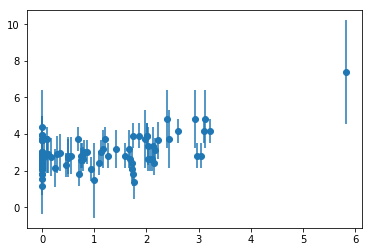

In [154]:
# plot predicted values with errors against MP calculated values
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

plt.errorbar(mp_bandgaps[0:100], prediction_values[0:100], prediction_errors[0:100], fmt='o');
plt.show()

In [155]:
# check to see how well predicted values match MP calculated bandgaps
corr = pearsonr(prediction_values, mp_bandgaps)
print(corr)

(0.40140519241199996, 1.0590203417472304e-68)
